# Creating a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [9]:
data = pd.read_excel('API_SP.POP.TOTL_DS2_en_excel_v2_218.xls', skiprows=3)

In [10]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


# Data Cleaning

In [11]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [12]:
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0
265,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3806310.0,3925952.0,4049778.0,4177931.0,4310332.0,4447149.0,...,13555422.0,13855753.0,14154937.0,14452704.0,14751101.0,15052184.0,15354608.0,15669666.0,15993524.0,16320537.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [14]:
# Checking Null values

data.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2018              1
2019              1
2020              1
2021              1
2022              1
Length: 67, dtype: int64

In [15]:
# Removing the Nul values

data.dropna().isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 67, dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
data.isna().sum().any()

True

In [19]:
data.isna().sum().any()

True

# Data Visualisation/Exploratory Analysis

In [20]:
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02
mean,1.172712e+08,1.188807e+08,1.210511e+08,1.237333e+08,1.264378e+08,1.291813e+08,1.320404e+08,1.348980e+08,1.378358e+08,1.408789e+08,...,2.927593e+08,2.966353e+08,3.004815e+08,3.043263e+08,3.081770e+08,3.119641e+08,3.156701e+08,3.192595e+08,3.225221e+08,3.254733e+08
std,3.695439e+08,3.740897e+08,3.808061e+08,3.895039e+08,3.982439e+08,4.071153e+08,4.164504e+08,4.257424e+08,4.353218e+08,4.452927e+08,...,9.186237e+08,9.300118e+08,9.412522e+08,9.524238e+08,9.636041e+08,9.744884e+08,9.850405e+08,9.951225e+08,1.004225e+09,1.012163e+09
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,...,1.069400e+04,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04
25%,5.132212e+05,5.231345e+05,5.337595e+05,5.449288e+05,5.566630e+05,5.651150e+05,5.691470e+05,5.773872e+05,5.832700e+05,5.875942e+05,...,1.697753e+06,1.743309e+06,1.788196e+06,1.777557e+06,1.791003e+06,1.797085e+06,1.788878e+06,1.790133e+06,1.786038e+06,1.761985e+06
50%,3.757486e+06,3.887144e+06,4.023896e+06,4.139356e+06,4.224612e+06,4.277636e+06,4.331825e+06,4.385700e+06,4.450934e+06,4.530800e+06,...,1.014958e+07,1.028212e+07,1.035808e+07,1.032545e+07,1.030030e+07,1.039533e+07,1.044767e+07,1.060623e+07,1.050577e+07,1.048694e+07
75%,2.670606e+07,2.748694e+07,2.830289e+07,2.914708e+07,3.001684e+07,3.084892e+07,3.163010e+07,3.209247e+07,3.249927e+07,3.277149e+07,...,6.023395e+07,6.078914e+07,6.073058e+07,6.062750e+07,6.053671e+07,6.042176e+07,5.987258e+07,6.170452e+07,6.358833e+07,6.549775e+07
max,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,3.398480e+09,3.468371e+09,3.540164e+09,3.614573e+09,...,7.229303e+09,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09


In [22]:
grouped_data = data.groupby("Country Name")["1960"].sum()
top_categories = grouped_data.nlargest(5)

# Print the grouped data
print("Grouped Data:")
print(top_categories)


Grouped Data:
Country Name
World                  3.031474e+09
IDA & IBRD total       2.297972e+09
Low & middle income    2.243179e+09
Middle income          2.107416e+09
IBRD only              1.904347e+09
Name: 1960, dtype: float64


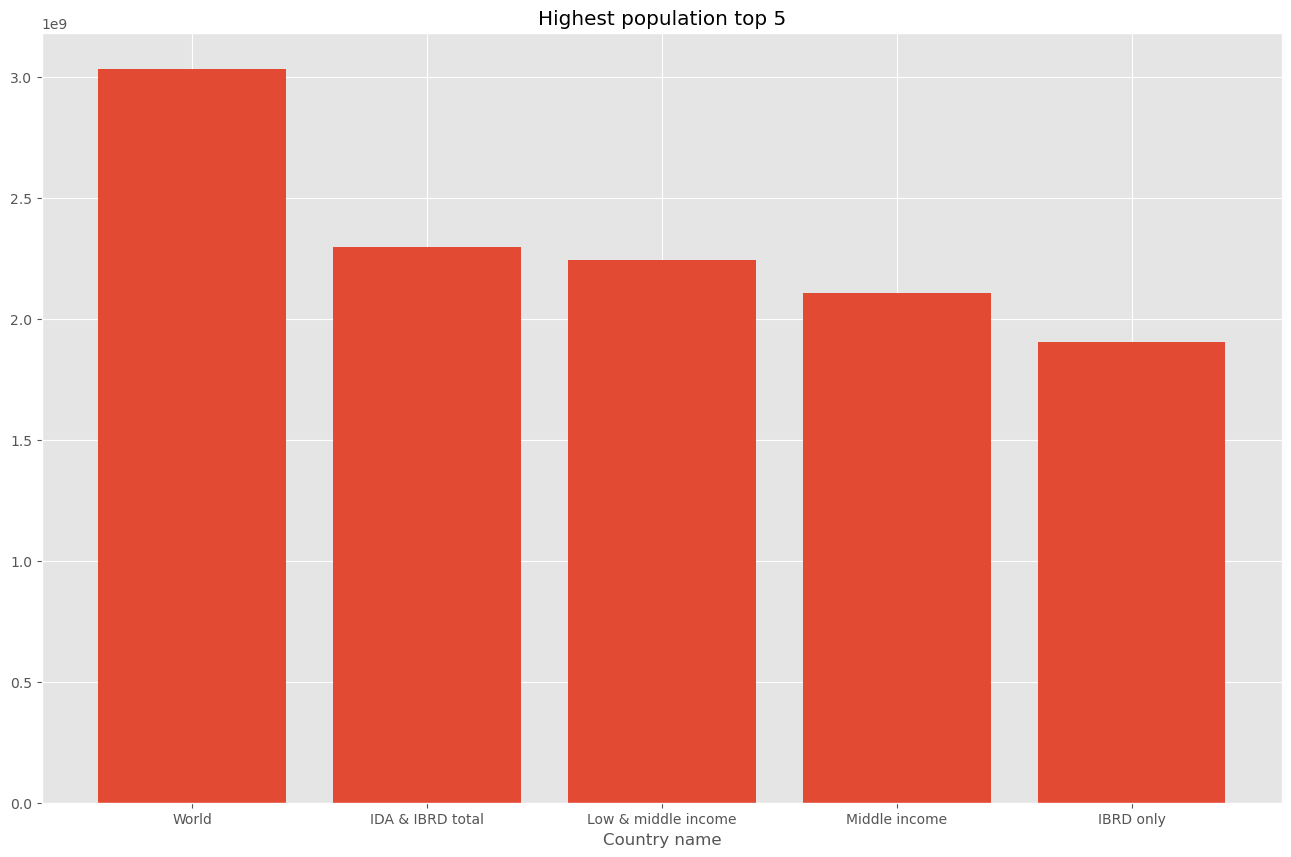

In [23]:
plt.figure(figsize=(16,10))
plt.bar(top_categories.index,top_categories.values)
plt.xlabel("Country name")
plt.title("Highest population top 5")
plt.show()

In [25]:
# Select the top 5 countries based on the population in 1970

top_countries_1970 = data.nlargest(5, '1970')

In [27]:
# Melt the DataFrame to reshape it for visualization

melted_data = top_countries_1970.melt(id_vars=['Country Name'], value_vars=['1960', '1970'], var_name='Year', value_name='Population')


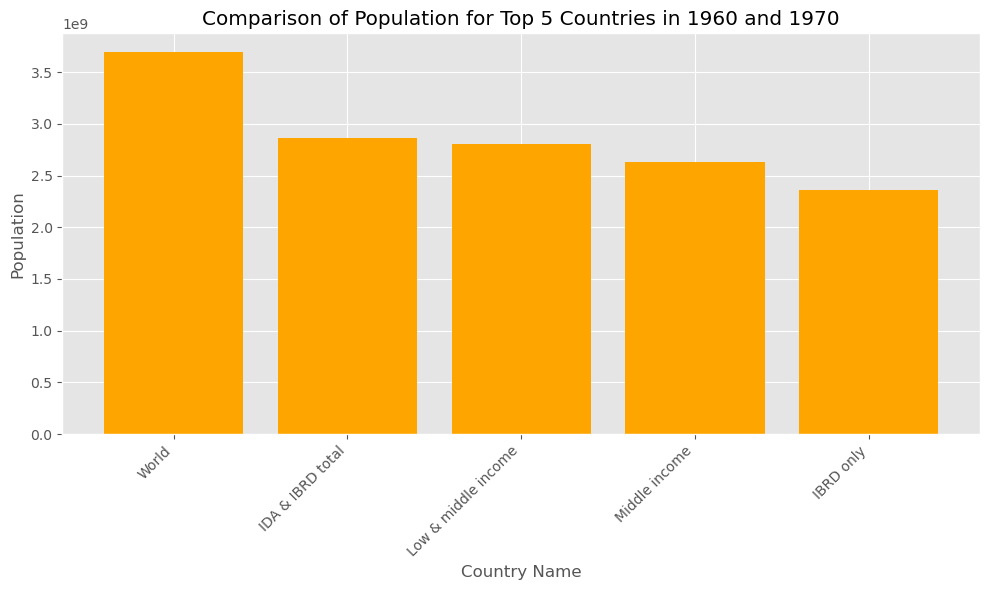

In [29]:
# Create a vertical bar graph
plt.figure(figsize=(10, 6))
plt.bar(melted_data['Country Name'], melted_data['Population'], color=melted_data['Year'].apply(lambda x: 'green' if x == '1960' else 'orange'))
plt.xlabel('Country Name')
plt.ylabel('Population')
plt.title('Comparison of Population for Top 5 Countries in 1960 and 1970')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
# Melt the DataFrame to reshape it into a more usable form

melted_data = data.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
var_name="Year", value_name="Population")

In [32]:
# Convert the 'Year' column to numeric values

melted_data["Year"] = pd.to_numeric(melted_data["Year"], errors="coerce")

In [33]:
# Find the country with the highest population

country_with_highest_population = melted_data.loc[melted_data["Population"].idxmax()]["Country Name"]
highest_population_country_data = melted_data[melted_data["Country Name"] == country_with_highest_population]

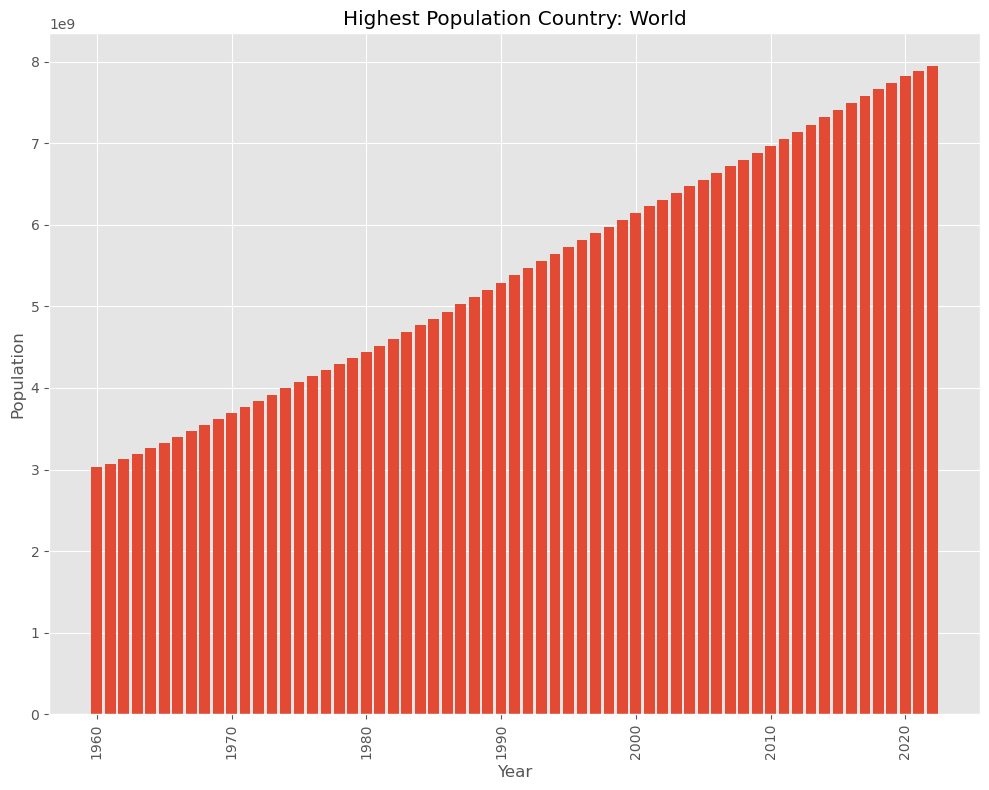

In [34]:
# Plot a bar graph for the highest population country

plt.figure(figsize=(10, 8))
plt.bar(highest_population_country_data["Year"], highest_population_country_data["Population"])
plt.xlabel("Year")
plt.ylabel("Population")
plt.title(f"Highest Population Country: {country_with_highest_population}")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
# Calculate the correlation matrix

correlation_matrix = data.iloc[:, 4:].corr()

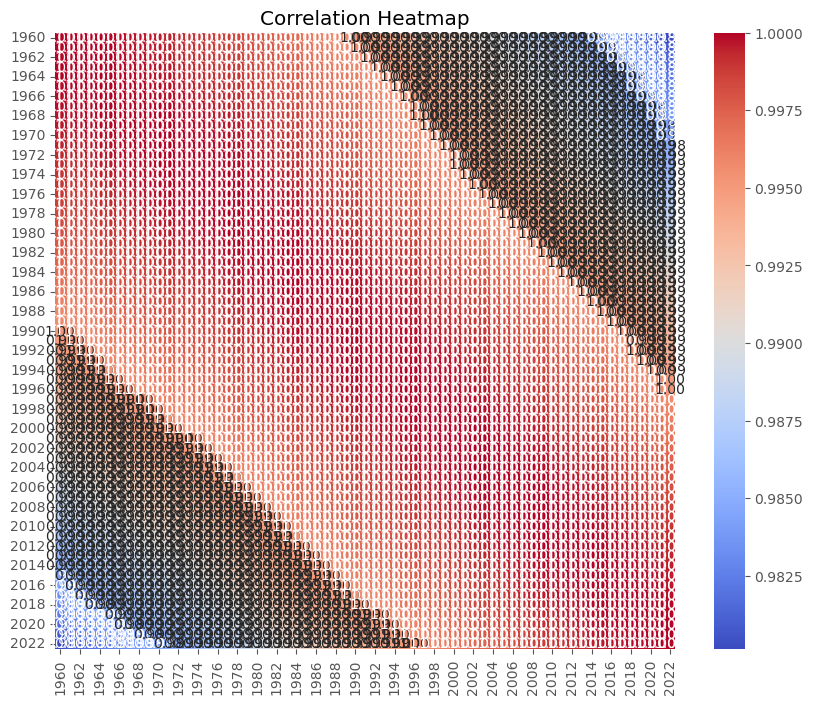

In [36]:
# Create a heatmap

plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap")
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

In [38]:
# Remove rows with non-numeric identifiers (e.g., 'WLD')

numeric_columns = data.columns[4:] # Assuming population columns start from index 4
data = data[data[numeric_columns].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna().all(axis=1)]

In [39]:
# Select the top 5 countries based on the population in 2022

top_countries_2022 = data.nlargest(5, '2022')

In [41]:
# Melt the DataFrame

melted_df = top_countries_2022.melt(id_vars=['Country Name'], value_vars=data.columns[4:], var_name='Year', value_name='Population')

In [42]:
# Convert Population column to numeric

melted_data['Population'] = pd.to_numeric(melted_data['Population'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


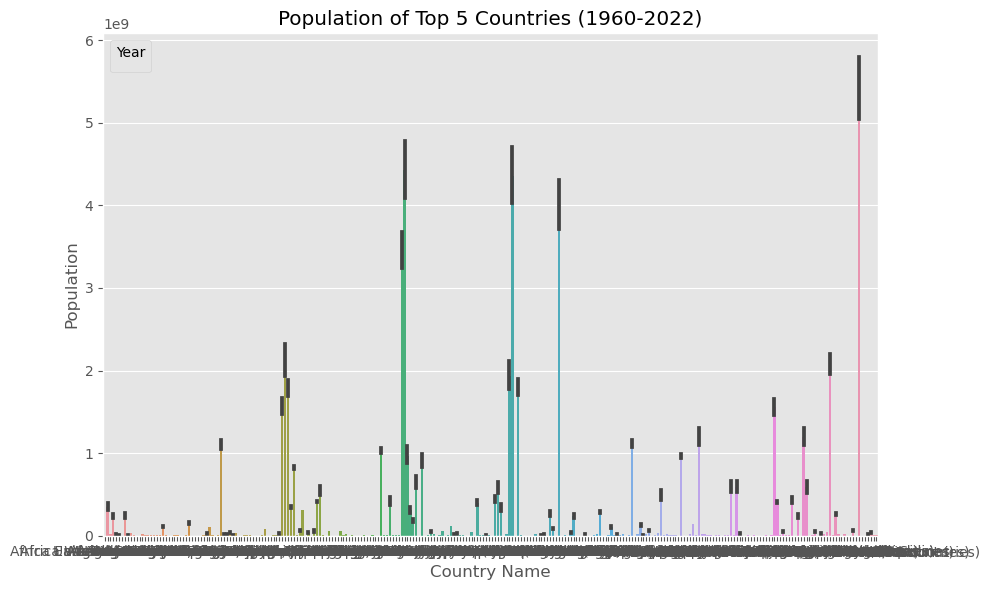

In [46]:
# Create a bar plot

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Country Name', y='Population')
plt.xlabel('Country Name')
plt.ylabel('Population')
plt.title('Population of Top 5 Countries (1960-2022)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

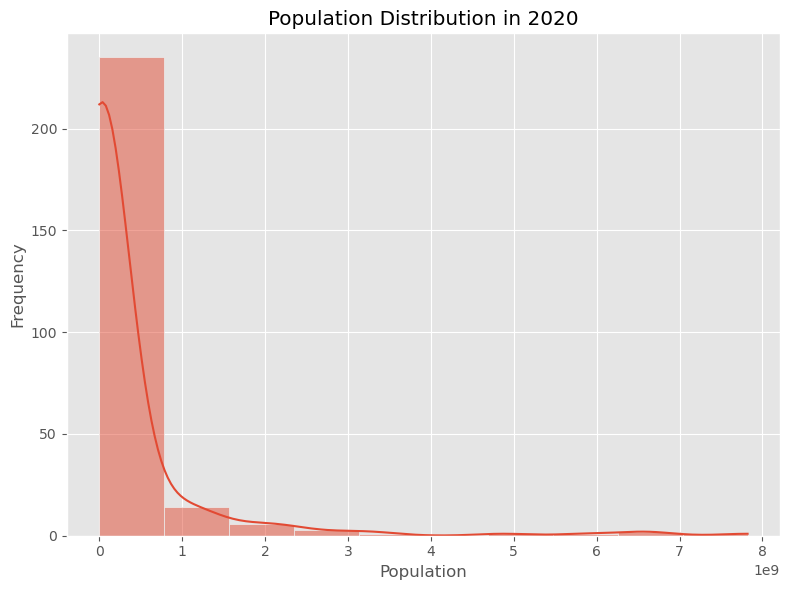

In [47]:
selected_year = '2020'
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=selected_year, bins=10, kde=True)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title(f'Population Distribution in {selected_year}')
plt.tight_layout()
plt.show()

In [48]:
# Melt the DataFrame

melted_data = data.melt(id_vars=['Country Name'], value_vars=data.columns[1:], var_name='Year', value_name='Population')

In [53]:
# Convert Population column to numeric

melted_data['Population'] = pd.to_numeric(melted_data['Population'], errors='coerce')

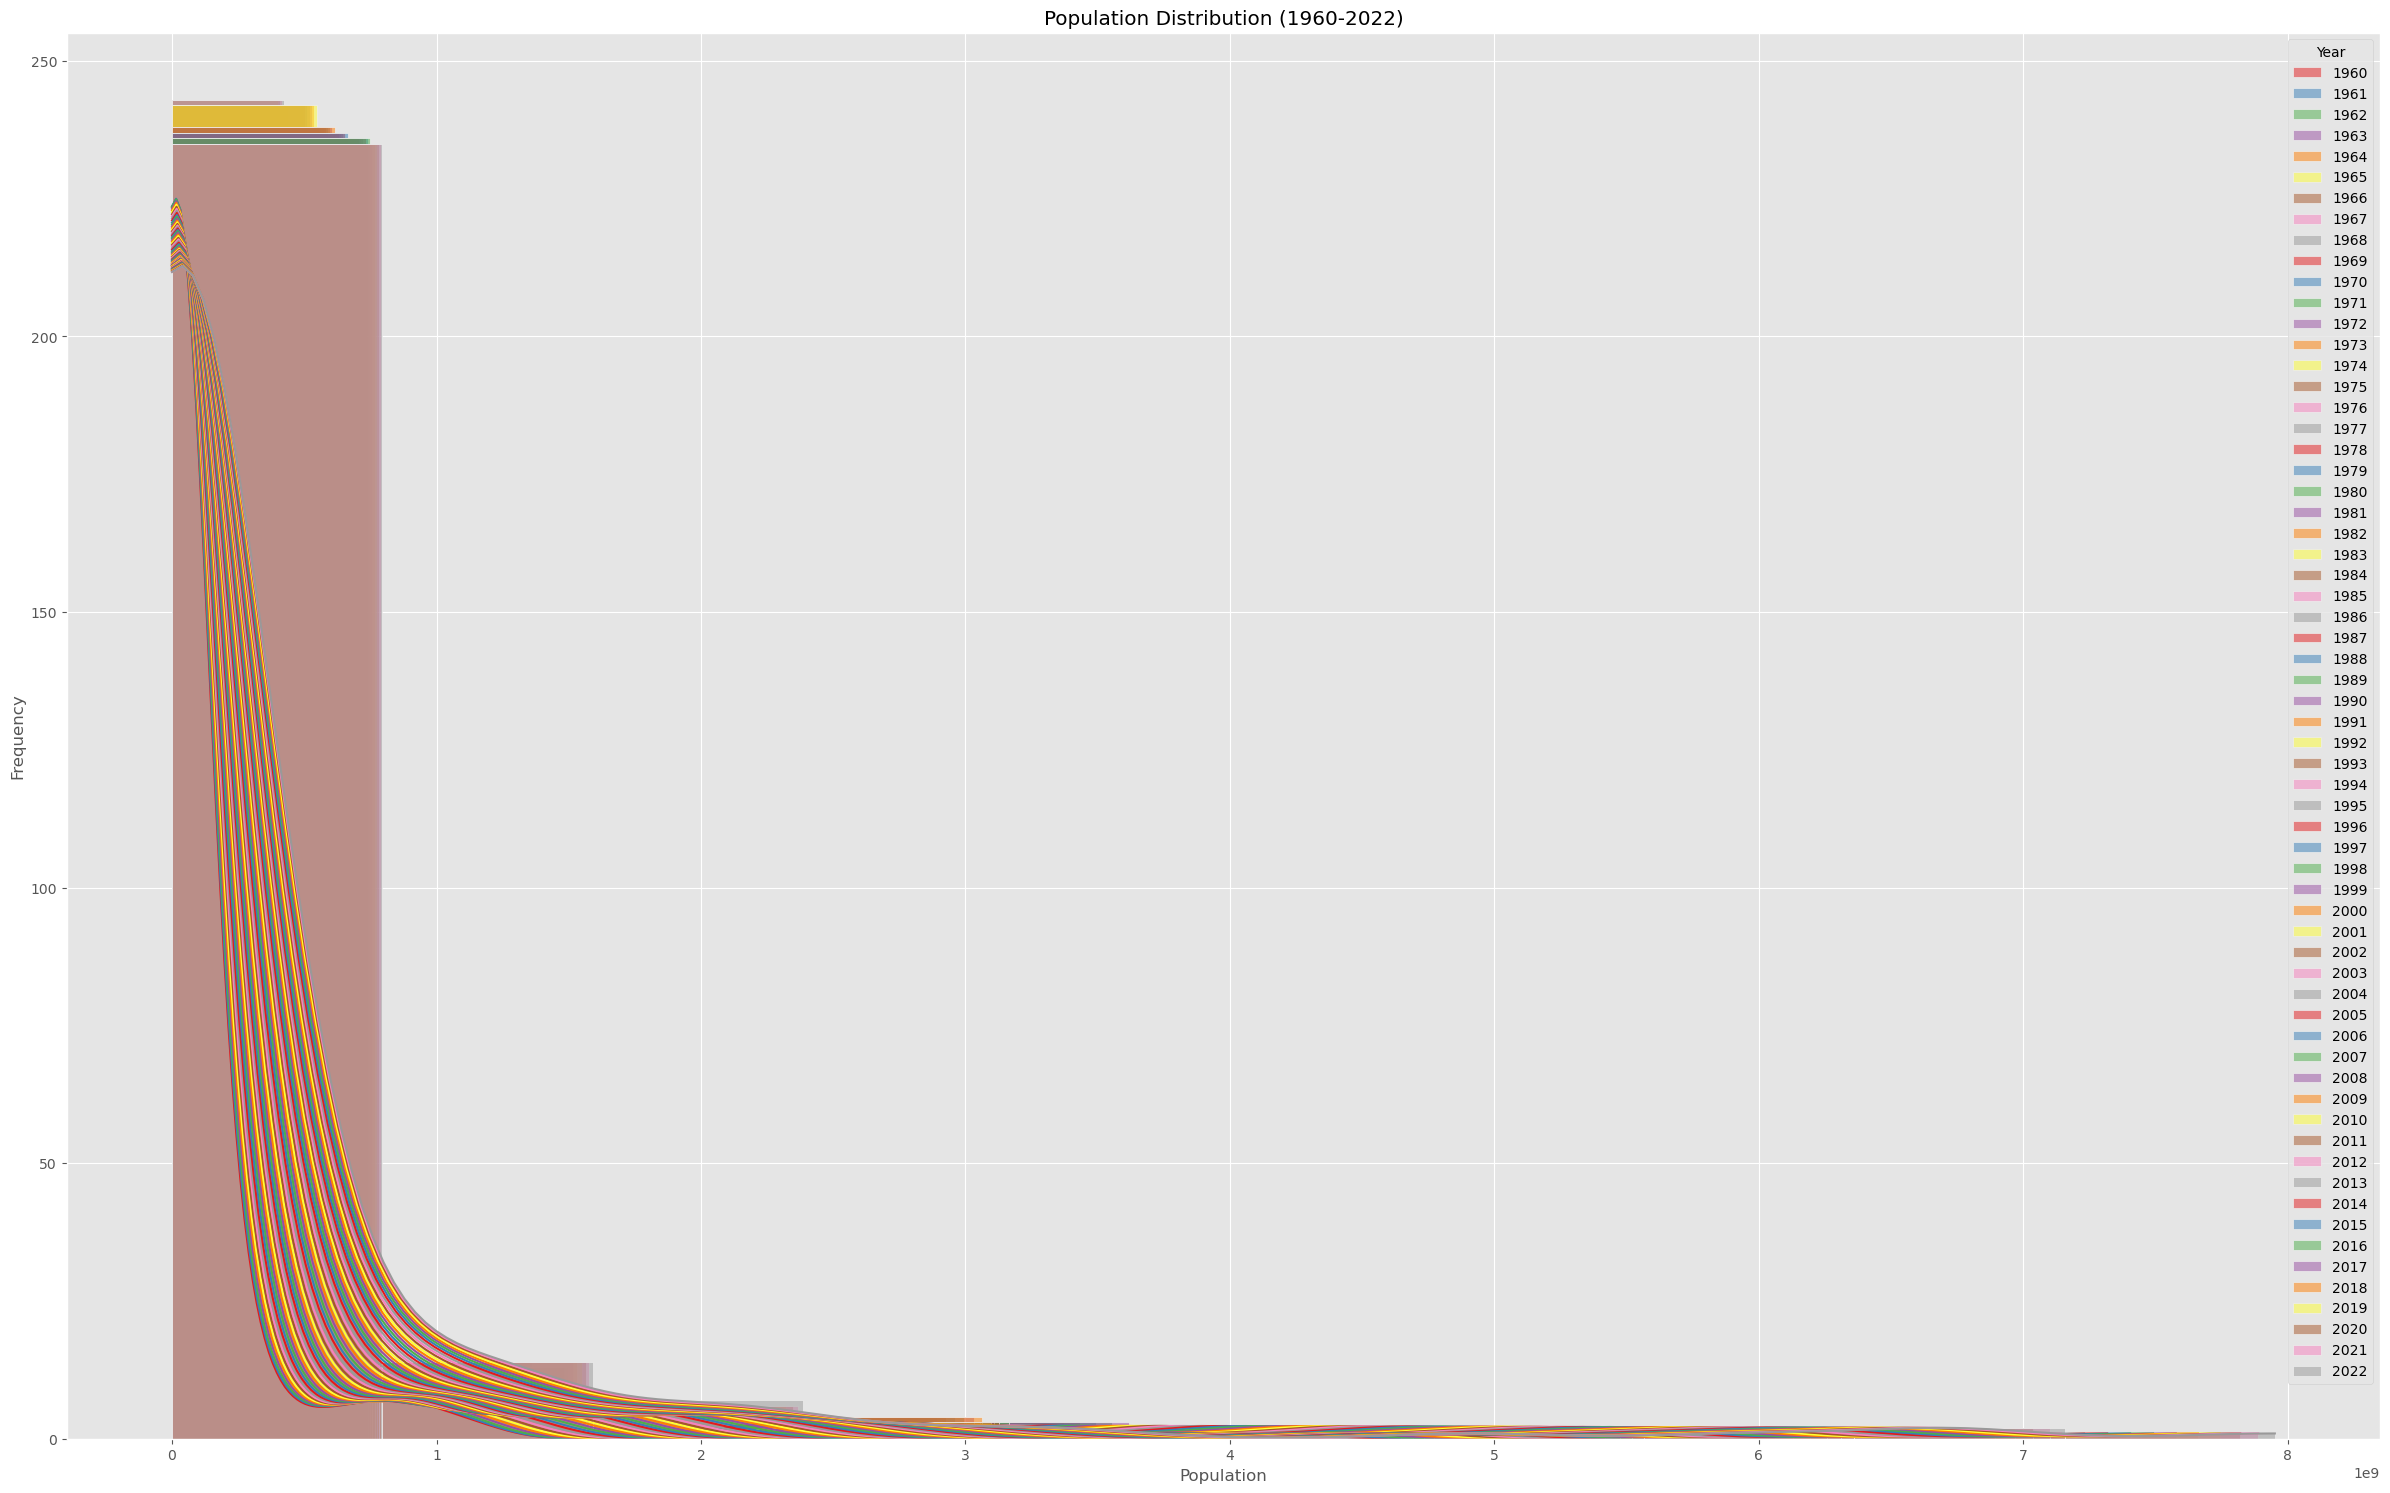

In [57]:
# Create a histogram for each year from 1960 to 2022 with different line colors
plt.figure(figsize=(24,16))
for idx, year in enumerate(range(1960, 2023)):
    year_data = melted_data[melted_data['Year'] == str(year)]
    color = sns.color_palette("Set1", n_colors=63)[idx] # Choose a color from the palette
    sns.histplot(data=year_data, x='Population', bins=10, kde=True, label=year, color=color, alpha=0.5)
    
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Distribution (1960-2022)')
plt.legend(title='Year', fontsize='medium')
plt.tight_layout()
plt.show()